## Lab: Cart Pole using OpenAI gym
## RL Basics and Simple Policy

### University of Virginia
### Reinforcement Learning
#### Last updated: May 26, 2025

---


#### Instructions:  

Carefully read the notes below and run the provided code. Answer each question clearly and show all results.

#### TOTAL POINTS: 10

---

### Agent and Environment

It is essential for the agent to have a way to get the next state and reward from the environment.

Sometimes it is possible for the agent to interact with environment in real life, but often this is expensive / dangerous / impossible.

We use models and simulators in this latter case.

For this reason, the Gym package is useful in RL

**Note**: Going forward, the fork [gymnasium](https://gymnasium.farama.org/) will maintain OpenAI gym.  
We will be using `gymnasium` but will still refer to the environment as `gym` when it doesn't cause confusion.

---

### Introduction to Gym

Gym is a toolkit for developing and comparing RL algorithms.

It comes with many pre-built environments which have functionality to emulate physical environments.

Users can build their own custom environments. See [here](https://towardsdatascience.com/creating-a-custom-openai-gym-environment-for-stock-trading-be532be3910e#:~:text=8%20min%20read-,Create%20custom%20gym%20environments%20from%20scratch%20%E2%80%94%20A%20stock%20market%20example,Atari%20games%20to%20experiment%20with.) for example.

---

### Cart Pole Problem

The **CartPole** problem has a small state space and action space, so it's popular for illustrating ideas.

Pole is attached to a cart on a frictionless track.

Pole starts upright

**Goal** is to keep pole from falling over

Control system by applying **force** -1 or +1 to cart.

**Reward** of +1 for each timestep the pole remains upright

**Episode** ends when pole is more than 12 degrees from vertical, or cart moves more than 2.4 units from center

CartPole-v1 defines *solving* as getting average reward of 195.0 over 100 consecutive trials.

<img src="https://github.com/jackburke12/applied_reinforcement_learning/blob/main/01_rl_fundamentals/cartpole.png?raw=1" alt="drawing" width="150"/>

---

### Setup and First Steps

This notebook can be easily run on [Google Colab](https://colab.research.google.com/)

In [92]:
! pip install gymnasium

We can use [renderlab](https://github.com/ryanrudes/renderlab/tree/main) to visualize *results*

In [93]:
! pip install renderlab

In [94]:
import gymnasium as gym
import renderlab as rl

Load the environment

In [95]:
env = gym.make("CartPole-v1", render_mode = "rgb_array")

state = env.reset(seed=314)
print(state)

(array([0.04225422, 0.02126478, 0.02520455, 0.00700802], dtype=float32), {})


Given the state, we take an action. The next state comes from the environment, which is encoded in `gym`.

The first element holds components:   
[0]: cart horizontal position (0.0 = center)  
[1]: velocity (positive means right)  
[2]: angle of the pole (0.0 = vertical)  
[3]: pole's angular velocity (positive means clockwise)

In [96]:
# state space number of components
env.observation_space.shape[0]

4

The action space consists of two options:

[0]: move cart left   
[1]: move cart right

In [97]:
env.action_space

Discrete(2)

Let's take an action, draw a sample and look at the results.

In [98]:
# move right
action = 1

# take a step and get next state, reward from environment
state, reward, terminated, truncated, info = env.step(action)
done = terminated or truncated

print('state', state)
print('reward', reward)
print('done', done)
print('info', info)

state [ 0.04267951  0.21601637  0.02534471 -0.27761722]
reward 1.0
done False
info {}


**Note about DONE**  
We need to understand if the episode is done after taking action  

The API now gives more detail on this variable, which may reach `done` state for two reasons:  
- **terminated**=True if environment terminates (eg. due to task completion, failure etc.)  
- **truncated**=True if episode truncates due to a time limit or a reason that is not defined as part of the task MDP.

**Run several steps by taking random actions**  

In [99]:
state = env.reset(seed=314)
for _ in range(5):
    print(env.step(env.action_space.sample())) # take a random action

(array([ 0.04267951,  0.21601637,  0.02534471, -0.27761722], dtype=float32), 1.0, False, False, {})
(array([0.04699984, 0.02054218, 0.01979236, 0.02295044], dtype=float32), 1.0, False, False, {})
(array([ 0.04741069,  0.21537478,  0.02025137, -0.26342264], dtype=float32), 1.0, False, False, {})
(array([0.05171818, 0.01996971, 0.01498292, 0.03557836], dtype=float32), 1.0, False, False, {})
(array([ 0.05211757,  0.21487363,  0.01569449, -0.2523399 ], dtype=float32), 1.0, False, False, {})


**Run an epoch by taking random actions. Visualize the results.**  

In [100]:
env = rl.RenderFrame(env, "./output")

observation, info = env.reset()

while True:
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)

    if terminated or truncated:
      break

env.play()

Moviepy - Building video temp-{start}.mp4.
Moviepy - Writing video temp-{start}.mp4



Moviepy - Done !
Moviepy - video ready temp-{start}.mp4


**Reward and Episode**  

For each time step that the cart keeps the pole balanced, it earns reward 1.

If the pole tilts too much or if the cart moves off screen, `reward=0` and `done=True` (the episode will end).

When the episode ends, a new episode may begin. The process learns cumulatively from each episode.

---

#### 1) Defining a function that runs a simple policy
**(POINTS: 1)**

When the pole leans left (negative angle), move left. When the pole leans right (positive angle), move right.  

The function should take the state and return an action. Test that it works properly.  

In [109]:
def basic_policy(state):
  pole_angle = state[2]
  if pole_angle < 0:
    return 0
  else:
    return 1

env = gym.make("CartPole-v1", render_mode="rgb_array")
state, info = env.reset(seed=314)

done = False
total_reward = 0

while not done:
    print(state[2])
    action = basic_policy(state)
    print(f'action: {action}')
    state, reward, terminated, truncated, info = env.step(action)
    total_reward += reward
    done = terminated or truncated

print("Total reward with simple policy:", total_reward)

0.025204547
action: 1
0.025344707
action: 1
0.019792363
action: 1
0.008548365
action: 1
-0.008423278
action: 0
-0.031194573
action: 0
-0.04816528
action: 0
-0.059481736
action: 0
-0.06525563
action: 0
-0.065562606
action: 0
-0.060441557
action: 0
-0.049894426
action: 0
-0.033886462
action: 0
-0.012346914
action: 0
0.014829819
action: 1
0.04778246
action: 1
0.074974574
action: 1
0.09661946
action: 1
0.11289944
action: 1
0.12396349
action: 1
0.1299258
action: 1
0.1308649
action: 1
0.12682337
action: 1
0.11780769
action: 1
0.10378862
action: 1
0.08470159
action: 1
0.06044747
action: 1
0.030893669
action: 1
-0.0041242866
action: 0
-0.04480057
action: 0
-0.07964877
action: 0
-0.10892864
action: 0
-0.13287298
action: 0
-0.15168427
action: 0
-0.16553245
action: 0
-0.17455366
action: 0
-0.17884944
action: 0
-0.17848645
action: 0
-0.17349647
action: 0
-0.1638765
action: 0
-0.1495891
action: 0
-0.13056278
action: 0
-0.10669255
action: 0
-0.077840835
action: 0
-0.043838553
action: 0
-0.00448684
a

#### 2) Simulating episodes with the simple policy  

2a) **(POINTS: 2)** Run 1000 episodes each with 100 time steps. Use the `simple_policy` for taking actions.  
Each time step will call the `step()` method to get the next state and reward. Produce a boxplot of the rewards from each episode.

In [102]:
import matplotlib.pyplot as plt

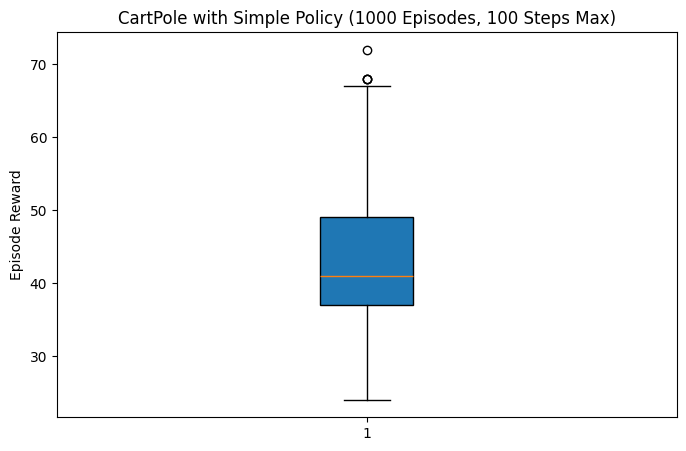

In [103]:
env = gym.make("CartPole-v1")

n_episodes = 1000
max_steps = 100
episode_rewards = []

for ep in range(n_episodes):
    state, info = env.reset()
    total_reward = 0

    for t in range(max_steps):
        action = basic_policy(state)
        state, reward, terminated, truncated, info = env.step(action)
        total_reward += reward
        if terminated or truncated:
            break
    episode_rewards.append(total_reward)

env.close()

# Boxplot of rewards
plt.figure(figsize=(8,5))
plt.boxplot(episode_rewards, vert=True, patch_artist=True)
plt.ylabel("Episode Reward")
plt.title("CartPole with Simple Policy (1000 Episodes, 100 Steps Max)")
plt.show()


2b) **(POINTS: 1)** Is this policy able to solve the cart pole problem? Explain your answer.

The cart pole problem is defined as solved when it gives an average reward >= 195 over 100 consecutive episodes. The boxplot above shows rewards ranging from about 10 to a maximum of about 70, which is below the target of 195. Given that we simulated 1000 episodes, we have enough data to claim that our policy is not sufficient to solve the cart pole problem, as it appears that not one of our episodes resulted in a reward over 195.

#### 3) From Question [2], what is the mean and maximum reward (roughly)?
**(POINTS: 1)**

In [104]:
import numpy as np
print(f'Mean reward:  {np.mean(episode_rewards)}')
print(f'Max reward: {np.max(episode_rewards)}')

Mean reward:  42.51
Max reward: 72.0


#### 4) Reversed Simple Policy
**(POINTS: 2)**

What happens if you reverse the simple policy, moving left when the pole leans right, and moving right when the pole leans left? This is not a good idea, but it's instructive. To show the result, produce the boxplot from before, and calculate the mean reward.

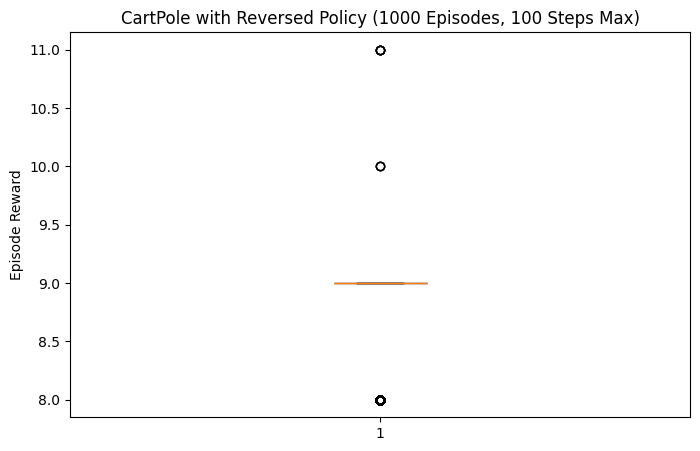

In [105]:
def reversed_policy(state):
  pole_angle = state[2]
  if pole_angle < 0:
    return 1
  else:
    return 0

env = gym.make("CartPole-v1")

n_episodes = 1000
max_steps = 100
episode_rewards = []

for ep in range(n_episodes):
    state, info = env.reset()
    total_reward = 0

    for t in range(max_steps):
        action = reversed_policy(state)
        state, reward, terminated, truncated, info = env.step(action)
        total_reward += reward
        if terminated or truncated:
            break
    episode_rewards.append(total_reward)

env.close()

# Boxplot of rewards
plt.figure(figsize=(8,5))
plt.boxplot(episode_rewards, vert=True, patch_artist=True)
plt.ylabel("Episode Reward")
plt.title("CartPole with Reversed Policy (1000 Episodes, 100 Steps Max)")
plt.show()


In [106]:
print(f'Mean reward with reversed policy: {np.mean(episode_rewards)}')

Mean reward with reversed policy: 8.768


Our reversed policy resulted in a much smaller average reward, around 9.

#### 5) Modified Policy
**(POINTS: 2)** Full points for attempt and clear explanation.

Time to get creative! See if you can try a different policy that improves the mean reward. Clearly explain your strategy.

We know that our policy has to return an action value of 0 or 1, and it has four possible parameters to use to calculate the action: horizontal position of the cart, horizontal velocity of the cart, pole angle, and pole angular velocity. We can take a linear combination of these four parameters, weighting them according to their importance.

The position of the cart is only important when it is far left or right. It should not be ignored, but it also is less important than the other parameters for keeping the pole upright. We'll choose 0.1 as the weight.

The cart velocity is slightly more important, as a fast-moving cart is more likely to go off the screen and end the run. We'll set its weight as 1, indicating that it is more important than cart position.

The pole angle is very important. If the pole reaches an extreme angle, the run will end immediately. We account for this by weighting it the highest, at 10.

The pole angular velocity is similarly important. If the velocity is too fast, the pole will be moving so quickly that it will take multiple corrective actions to slow it down, moving our cart too far to the right or left. We'll weight this slightly heavier than cart speed, at 2, but lower than pole angle.

If the calculated value from our linear combination is greater than 0, we will return an action value of 1, moving the cart to the right. If the calculated value is negative, we'll return 0 and move the cart left.


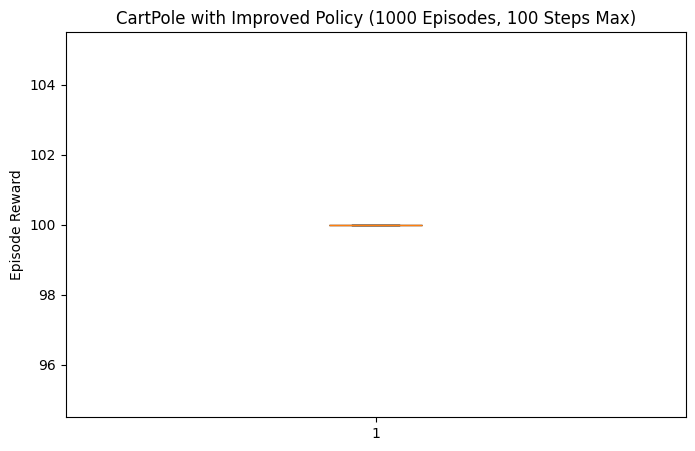

In [107]:
def improved_policy(state):
  horizontal_position = state[0]
  velocity = state[1]
  pole_angle = state[2]
  pole_angular_velocity = state[3]

  position_weight = 0.1
  velocity_weight = 1
  pole_angle_weight = 10
  pole_angular_velocity_weight = 2

  #linear combination of the parameters and their weights
  action_value = horizontal_position * position_weight + velocity * velocity_weight + pole_angle * pole_angle_weight + pole_angular_velocity * pole_angular_velocity_weight

  #move cart right if calculated value is positive, left if negative
  return 1 if action_value > 0 else 0

env = gym.make("CartPole-v1")

#run 1000 episodes with 100 steps as before, to see if our policy improves the basic policy
n_episodes = 1000
max_steps = 100
episode_rewards = []

def run_cartpole(env, n_episodes, max_steps, episode_rewards):
  for ep in range(n_episodes):
      state, info = env.reset()
      total_reward = 0

      for t in range(max_steps):
          action = improved_policy(state)
          state, reward, terminated, truncated, info = env.step(action)
          total_reward += reward
          if terminated or truncated:
              break
      episode_rewards.append(total_reward)

  env.close()

run_cartpole(env, 1000, 100, episode_rewards)

# Boxplot of rewards
plt.figure(figsize=(8,5))
plt.boxplot(episode_rewards, vert=True, patch_artist=True)
plt.ylabel("Episode Reward")
plt.title("CartPole with Improved Policy (1000 Episodes, 100 Steps Max)")
plt.show()

With the improved policy, every run is reaching a reward of 100, which is the maximum number of steps. Let's expand the max steps to 500 and run 100 consecutive episodes to see if we have "solved" this problem.

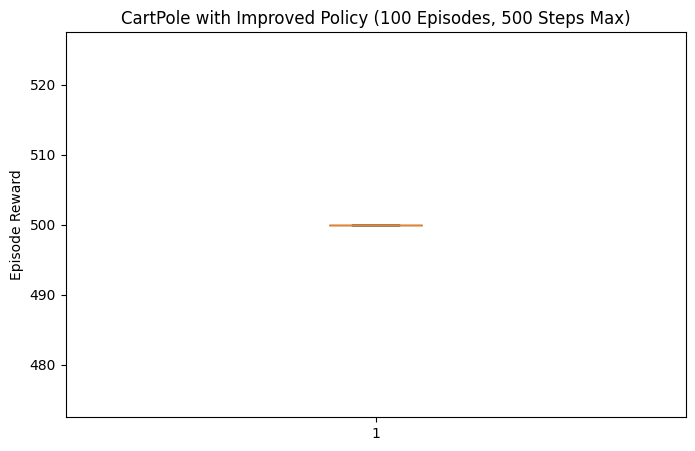

Mean reward: 500.0


In [110]:
env = gym.make("CartPole-v1", render_mode="rgb_array")
episode_rewards = []
run_cartpole(env, 100, max_steps=1000, episode_rewards=episode_rewards)

# Boxplot of rewards
plt.figure(figsize=(8,5))
plt.boxplot(episode_rewards, vert=True, patch_artist=True)
plt.ylabel("Episode Reward")
plt.title("CartPole with Improved Policy (100 Episodes, 500 Steps Max)")
plt.show()

print(f'Mean reward: {np.mean(episode_rewards)}')

The mean reward over 100 episodes is 500, which is the maximum number of steps. Our new policy has solved the cart pole problem!

---  

### Wrapup

This demo illustrated some basic ideas of reinforcement learning and got you started with OpenAI Gym.

We will revisit this example later, bringing in more tools for a better solution.

---
